#### Plots median and 68% CI for [Mg/Fe] vs different [Fe/H] bins for new SN Ia runs - 3 plots side-by-side; 1 each for m12i, m11e, and m11b overplotting the different variant runs in each one

@author: Pratik Gandhi <pjgandhi@ucdavis.edu>

First created: April 2021

In [7]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii
import glob

In [8]:
# setting matplotlib parameters to make plots look more nicer
plt.rcParams['legend.frameon'] = False
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['figure.figsize'] = (24, 10)
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.variant'] = 'normal'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.stretch'] = 'normal'
plt.rcParams['font.size'] = 33.0
plt.rcParams['mathtext.fontset'] = 'dejavusans'
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['axes.labelsize'] = 33.0
plt.rcParams['axes.labelpad'] = 6.0
plt.rcParams['axes.titlepad'] = 8.0
plt.rcParams['axes.titlesize'] = 33.0
plt.rcParams['axes.formatter.limits'] = -7,7
plt.rcParams['xtick.major.size'] = 18.0
plt.rcParams['ytick.major.size'] = 18.0
plt.rcParams['xtick.minor.size'] = 12.0
plt.rcParams['ytick.minor.size'] = 12.0
plt.rcParams['xtick.major.pad'] = 12.0
plt.rcParams['ytick.major.pad'] = 12.0
plt.rcParams['xtick.minor.pad'] = 12.0
plt.rcParams['ytick.minor.pad'] = 12.0
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 1
plt.rcParams['figure.constrained_layout.use'] = False

#### Multi-panel plot with shaded regions: m12i, m11e, and m11b variants

In [9]:
# defining parameters for plot legibility
cmap = plt.cm.get_cmap('viridis')
colours = ['black', 'black', 'red', 'red', 'royalblue', 'royalblue']
linestyles = ['dashed', 'solid', 'dashed', 'solid', 'dashed', 'solid']
linewidths = [5, 5, 5, 5, 5, 5]
sim_labels = ['FIRE-2', 'Maoz+17', '$\\alpha=0.5$,cap=100x', '$\\alpha=0.5$,cap=10x', \
              '$\\alpha=1.0$,cap=100x', '$\\alpha=1.0$,cap=10x']

In [10]:
# data points for M31 satellite dwarfs from Vargas+14
ngc185_mass = 6.8*10**7
ngc185_Fe = [-2.0, -1.5, -1.0]
ngc185_Mg_mid = [0.167, 0.137, 0.107]
ngc185_Mg_err = [0.085, 0.085, 0.085]
andVII_mass = 1.6*10**7
andVII_Fe = [-2.0, -1.5, -1.0]
andVII_Mg_mid = [0.293, 0.257, 0.297]
andVII_Mg_err = [0.126, 0.085, 0.085]
andII_mass = 9.1*10**6
andII_Fe = [-2.0, -1.5, -1.0]
andII_Mg_mid = [0.096, 0.041, -0.049]
andII_Mg_err = [0.085, 0.085, 0.085]

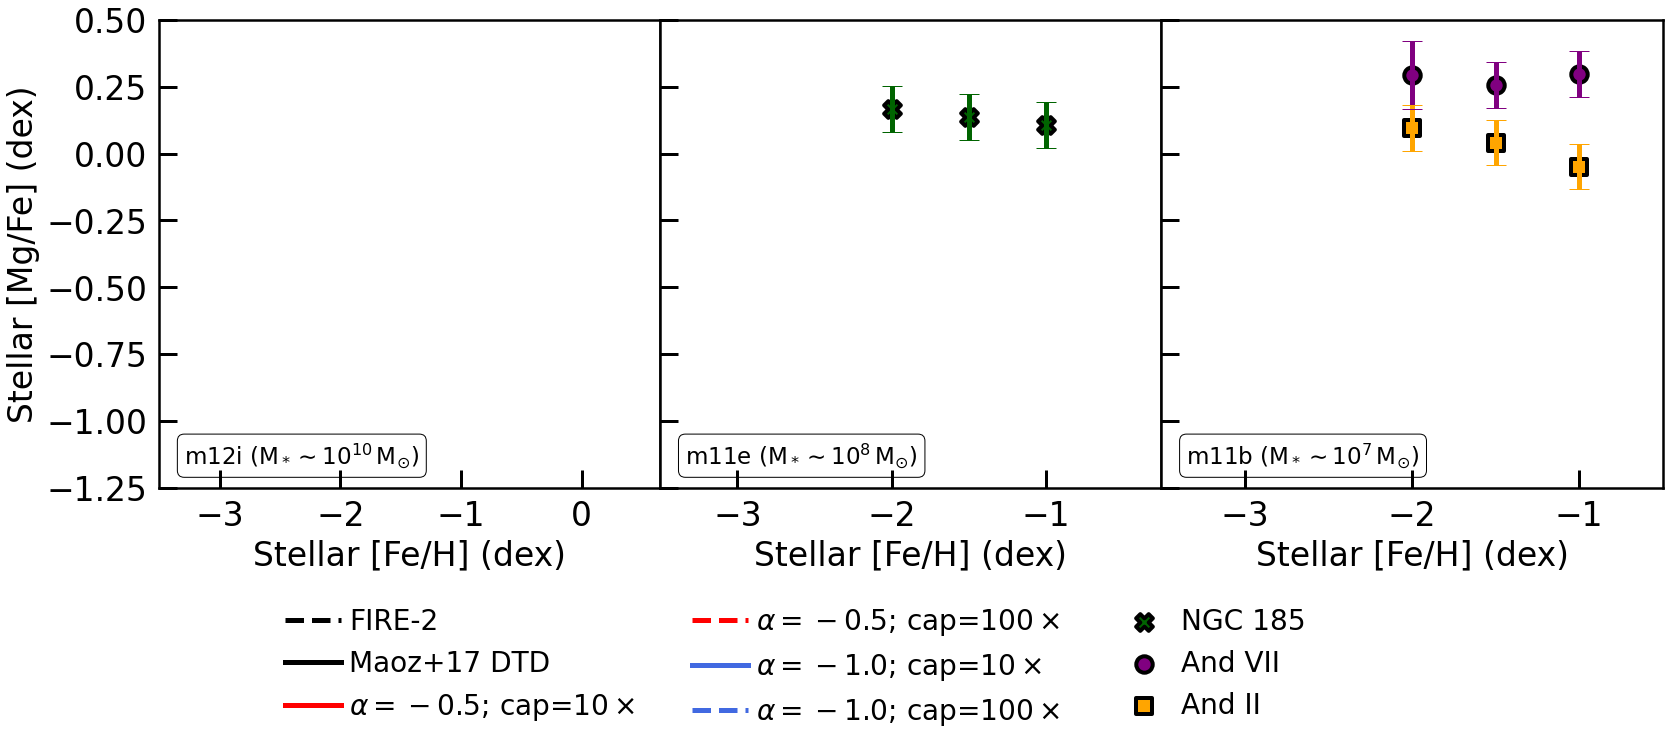

In [11]:
# initialising overall figure
fig, ax = plt.subplots(1,3)
#fig.set_tight_layout(False)
fig.subplots_adjust(left=0.1, right=0.97, top=0.98, bottom=0.33, wspace=0)

# looping over and plotting m12i variant runs' 2D scatter data on left hand panel
data_files = sorted(glob.glob('./Research/Andrew/SN Ia Rates/paper_SNrates/data/m12i*swb_FeH-MgFe_2Dscatter_shaded.txt'))

for sim in range(0, len(data_files)):
    
    # reading in data
    data = ascii.read(data_files[sim])
    FeH_median = data['[Fe/H]median']
    MgFe_median = np.array(data['[Mg/Fe]median'])
    MgFe_err_low = np.array(data['[Mg/Fe]low'])
    MgFe_err_high = np.array(data['[Mg/Fe]high'])
    
    # converting from error bars to CI 
    MgFe_upper = MgFe_median + MgFe_err_high
    MgFe_lower = MgFe_median - MgFe_err_low
    
    # plotting values for this particular run
    ax[0].plot(FeH_median, MgFe_median, color=colours[sim], lw=linewidths[sim], \
            linestyle=linestyles[sim], alpha=1.0, label=None)
    ax[0].fill_between(FeH_median, MgFe_lower, MgFe_upper, color=colours[sim], \
                    alpha=0.15, label=None)
    
# looping over and plotting m11e variant runs' 2D scatter data on centre panel
data_files = sorted(glob.glob('./Research/Andrew/SN Ia Rates/paper_SNrates/data/m11e*swb_FeH-MgFe_2Dscatter_shaded.txt'))

for sim in range(0, len(data_files)):
    
    # reading in data
    data = ascii.read(data_files[sim])
    FeH_median = data['[Fe/H]median']
    MgFe_median = np.array(data['[Mg/Fe]median'])
    MgFe_err_low = np.array(data['[Mg/Fe]low'])
    MgFe_err_high = np.array(data['[Mg/Fe]high'])
    
    # converting from error bars to CI 
    MgFe_upper = MgFe_median + MgFe_err_high
    MgFe_lower = MgFe_median - MgFe_err_low
    
    # plotting values for this particular run
    ax[1].plot(FeH_median, MgFe_median, color=colours[sim], lw=linewidths[sim], \
            linestyle=linestyles[sim], alpha=1.0, label=None)
    ax[1].fill_between(FeH_median, MgFe_lower, MgFe_upper, color=colours[sim], \
                    alpha=0.15, label=None)

# looping over and plotting m11b variant runs' 2D scatter data on right hand panel
data_files = sorted(glob.glob('./Research/Andrew/SN Ia Rates/paper_SNrates/data/m11b*swb_FeH-MgFe_2Dscatter_shaded.txt'))

for sim in range(0, len(data_files)):
    
    # reading in data
    data = ascii.read(data_files[sim])
    FeH_median = data['[Fe/H]median']
    MgFe_median = np.array(data['[Mg/Fe]median'])
    MgFe_err_low = np.array(data['[Mg/Fe]low'])
    MgFe_err_high = np.array(data['[Mg/Fe]high'])
    
    # converting from error bars to CI 
    MgFe_upper = MgFe_median + MgFe_err_high
    MgFe_lower = MgFe_median - MgFe_err_low
    
    # plotting values for this particular run
    ax[2].plot(FeH_median, MgFe_median, color=colours[sim], lw=linewidths[sim], \
            linestyle=linestyles[sim], alpha=1.0, label=None)
    ax[2].fill_between(FeH_median, MgFe_lower, MgFe_upper, color=colours[sim], \
                    alpha=0.15, label=None)

# plotting M31 dwarf abundances for comparison with m11b on right hand panel    
ax[2].scatter(andVII_Fe, andVII_Mg_mid, c='purple', marker='o', s=270, alpha=1, \
              edgecolors='k', linewidths=4, zorder=100000, label=None)
ax[2].errorbar(andVII_Fe, andVII_Mg_mid, yerr=andVII_Mg_err, fmt='none', \
               ecolor='purple', capsize=10, elinewidth=5, zorder=100000, label=None)
ax[2].scatter(andII_Fe, andII_Mg_mid, c='orange', marker='s', s=250, alpha=1, \
              edgecolors='k', linewidths=4, zorder=100000, label=None)
ax[2].errorbar(andII_Fe, andII_Mg_mid, yerr=andII_Mg_err, fmt='none', \
               ecolor='orange', capsize=10, elinewidth=5, zorder=100000, label=None)

# plotting M31 dwarf abundances for comparison with m11e on centre panel
ax[1].scatter(ngc185_Fe, ngc185_Mg_mid, c='darkgreen', marker='X', s=280, alpha=1, \
              edgecolors='k', linewidths=4, zorder=100000, label=None)
ax[1].errorbar(ngc185_Fe, ngc185_Mg_mid, yerr=ngc185_Mg_err, fmt='none', \
               ecolor='darkgreen', capsize=10, elinewidth=5, zorder=100000, label=None)

# dummy points for legend
ax[0].plot([10,20], [10,20], color=colours[0], lw=linewidths[0], \
           linestyle=linestyles[0], alpha=1.0, label='FIRE-2')
ax[0].plot([10,20], [10,20], color=colours[1], lw=linewidths[1], \
           linestyle=linestyles[1], alpha=1.0, label='Maoz+17 DTD')
ax[0].plot([10,20], [10,20], color=colours[3], lw=linewidths[3], \
           linestyle=linestyles[3], alpha=1.0, label='$\\alpha=-0.5$; cap=$10\\times$')
ax[0].plot([10,20], [10,20], color=colours[2], lw=linewidths[2], \
           linestyle=linestyles[2], alpha=1.0, label='$\\alpha=-0.5$; cap=$100\\times$')
ax[0].plot([10,20], [10,20], color=colours[5], lw=linewidths[5], \
           linestyle=linestyles[5], alpha=1.0, label='$\\alpha=-1.0$; cap=$10\\times$')
ax[0].plot([10,20], [10,20], color=colours[4], lw=linewidths[4], \
           linestyle=linestyles[4], alpha=1.0, label='$\\alpha=-1.0$; cap=$100\\times$')
ax[0].scatter(10, 10, c='darkgreen', marker='X', s=280, alpha=1, \
              edgecolors='k', linewidths=4, zorder=100000, label='NGC 185')
ax[0].scatter(10, 10, c='purple', marker='o', s=270, alpha=1, \
              edgecolors='k', linewidths=4, zorder=100000, label='And VII')
ax[0].scatter(10, 10, c='orange', marker='s', s=250, alpha=1, \
              edgecolors='k', linewidths=4, zorder=100000, label='And II')

# specifying rest of left hand plot
ax[0].set_xlabel('Stellar [Fe/H] (dex)')
ax[0].set_ylabel('Stellar [Mg/Fe] (dex)')
ax[0].set_xlim(-3.5, 0.65)
ax[0].set_ylim(-1.25, 0.5)
ax[0].legend(prop={'size':28}, loc='upper left', ncol=3, \
             bbox_to_anchor=(0.2, -0.2), fancybox=True)

# specifying rest of centre plot
ax[1].set_xlabel('Stellar [Fe/H] (dex)')
ax[1].set_xlim(-3.5, -0.25)
ax[1].set_ylim(-1.25, 0.5)
#ax[1].legend(prop={'size':25}, loc='upper left', ncol=1)

# specifying rest of right hand plot
ax[2].set_xlabel('Stellar [Fe/H] (dex)')
ax[2].set_xlim(-3.5, -0.5)
ax[2].set_ylim(-1.25, 0.5)
#ax[2].legend(prop={'size':25}, loc='upper left', ncol=1)

# adding annotation for sim names
ax[0].text(0.05, 0.1, 'm12i ($\\rm{M_*} \\sim 10^{10} \, \\rm{M}_{\\odot}$)', \
           transform=ax[0].transAxes, fontsize=23, verticalalignment='top', \
           bbox=dict(boxstyle='round', facecolor='none'))
ax[1].text(0.05, 0.1, 'm11e ($\\rm{M_*} \\sim 10^{8} \, \\rm{M}_{\\odot}$)', \
           transform=ax[1].transAxes, fontsize=23, verticalalignment='top', \
           bbox=dict(boxstyle='round', facecolor='none'))
ax[2].text(0.05, 0.1, 'm11b ($\\rm{M_*} \\sim 10^{7} \, \\rm{M}_{\\odot}$)', \
           transform=ax[2].transAxes, fontsize=23, verticalalignment='top', \
           bbox=dict(boxstyle='round', facecolor='none'))

# eliminate tick labels on common y axes so only left hand plot has y ticks
plt.setp(ax[1].get_yticklabels(), visible=False)
plt.setp(ax[2].get_yticklabels(), visible=False)

# specifying rest of overall figure parameter
fig.subplots_adjust(wspace=0)
plt.savefig('./figure7_newruns-FeH-MgFe-2Dscatter_shaded.png')
plt.show()